<a href="https://colab.research.google.com/github/naimul97/nht97/blob/master/Classification_0f_Alzheimer_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install scikit-plot
import scikitplot as skplt


In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/ALZD/ALZD1/Alzheimer_s Dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
image_size = (224, 224) #  efficienetB0, efficienetB1, efficienetB2, efficienetB2, efficienetB3, efficienetB4, efficienetB5,efficienetB6, , ResNet50V2,
# image_size = (240, 240) # efficienetB6
# image_size = (260, 260) # efficienetB7
# image_size = (300, 300) # MobileNet



In [ ]:
input_shapes = (224, 224, 3) # efficienetB0,  efficienetB2, efficienetB2, efficienetB3, efficienetB4, efficienetB5,efficienetB6, , ResNet50V2,
# input_shapes = (240, 240, 3) # efficienetB6
# input_shapes = (260, 260, 3) # efficienetB7
# input_shapes = (300, 300, 3) # MobileNet

In [ ]:
batch_size = 20
LEARNING_RATE=0.0001
num_classes=4

In [ ]:
epochs = 1
# epochs = 5
#epochs = 10
#epochs = 15
#epochs = 20
#epochs = 25
#epochs = 30
#epochs = 35

In [ ]:
trdata=tf.keras.preprocessing.image.ImageDataGenerator( 
    validation_split=0.2
)

train_ds = trdata.flow_from_directory(
    directory=train_dir,
     target_size=image_size,
    class_mode="categorical",
    subset="training",
    batch_size=batch_size,
    shuffle=True,
)

valdata=tf.keras.preprocessing.image.ImageDataGenerator()

val_ds = trdata.flow_from_directory(
    directory=train_dir,
   target_size=image_size,
    class_mode="categorical",
    subset="validation",
    batch_size=batch_size,
)

testdata=tf.keras.preprocessing.image.ImageDataGenerator()

test_ds = testdata.flow_from_directory(
    directory=test_dir,
    target_size=image_size,
    class_mode="categorical",
    batch_size=batch_size,
    shuffle=False,
)



Found 4148 images belonging to 4 classes.
Found 1036 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
!pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-zibejgys
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-zibejgys


In [ ]:

from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import MobileNetV2


from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import pandas as pd
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.python.client import device_lib
import scikitplot as skplt


In [ ]:
conv_base = EfficientNetB1(weights="imagenet", include_top=False, input_shape=input_shapes )
#conv_base = EfficientNetB2(weights="imagenet", include_top=False, input_shape=input_shapes )
#conv_base = EfficientNetB3(weights="imagenet", include_top=False, input_shape=input_shapes )
#conv_base = EfficientNetB4(weights="imagenet", include_top=False, input_shape=input_shapes )
#conv_base = EfficientNetB5(weights="imagenet", include_top=False, input_shape=input_shapes )
#conv_base = EfficientNetB6(weights="imagenet", include_top=False, input_shape=input_shapes )
#conv_base = EfficientNetB7(weights="imagenet", include_top=False, input_shape=input_shapes )
#conv_base = ResNet50(weights="imagenet", include_top=False, input_shape=input_shapes )

# conv_base = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shapes)
# conv_base = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shapes)


In [ ]:
\

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
model.add(layers.Dropout(rate=0.2, name="dropout_out"))
# Set NUMBER_OF_CLASSES to the number of your final predictions.
model.add(layers.Dense(num_classes, activation="softmax", name="fc_out"))
conv_base.trainable = False

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=LEARNING_RATE),
    metrics=["acc"],
)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
# fit model
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[es])
# evaluate the model

208/208 [==============================] - 793s 4s/step - loss: 2.4953 - acc: 0.4086 - val_loss: 1.4865 - val_acc: 0.4411


In [ ]:
import matplotlib.pyplot as plt
import sklearn
from itertools import product
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
class_labels = test_ds.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


Y_pred = model.predict_generator(test_ds)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

predicted_classes = np.argmax(Y_pred, axis=1)

cnf_matrix = confusion_matrix(test_ds.classes, y_pred)
plt.figure()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

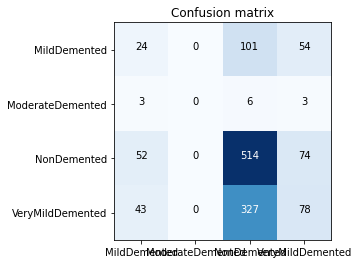

In [ ]:
import itertools

plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix")


tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes, rotation=0)


fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
  plt.text(j, i, "{:,}".format(cnf_matrix[i, j]),
           horizontalalignment="center",
           color="white" if cnf_matrix[i, j] > thresh else "black")



In [ ]:
print(classification_report(test_ds.classes, y_pred, target_names=target_names,digits=4))

                  precision    recall  f1-score   support

    MildDemented     0.1967    0.1341    0.1595       179
ModerateDemented     0.0000    0.0000    0.0000        12
     NonDemented     0.5422    0.8031    0.6474       640
VeryMildDemented     0.3732    0.1741    0.2374       448

        accuracy                         0.4816      1279
       macro avg     0.2780    0.2778    0.2611      1279
    weighted avg     0.4296    0.4816    0.4294      1279



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
